In [1]:
using constants
using types
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

Ts=collect(300.0:10.0:800.0)
numofn=[-1.5e20]#,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
numofnn=[1e17]
xs=[0.287]#collect(0.0:0.01:1.0)

var0=[Ts[1],xs[1]]
Eoff=0.0
Ev(var)=Eoff
Ec(var)=Ev(var)+EgSiGe(var[1],var[2]) #var[1]:T var[2]:x

effMassV(var)=-1.2*me
effMassC(var)=1.4*me#1.4/6^(2/3)*me

bandC=parBandTx(effMassC(var0),0.0,Ec(var0),[Ec],[effMassC],var0)
bandV=parBandTx(effMassV(var0),0.0,Ev(var0),[Ev],[effMassV],var0)
#bndstTx=BandStrucTx([bandV,bandC,bandC,bandC,bandC,bandC,bandC],var0)
bndstTx=BandStrucTx([bandC],var0)
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst var[9]:NNI
#DefP=[3.8,7.0]
ksi=21.0
tauAC(var)=tauAC_func(ClSiGe(var[4],var[2]),DefP(var[1]),var[2],var[1],var[3],var[6])
tauII2(var)=tauII2_func(ksi*eps0,eps0,var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauNI(var)=tauNI_func(ksi*eps0,var[1],var[9])
vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
#vartau0=[bandC.effMass,Ts[1],1.0,xs[1],1.5,bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
tauTOTTx=tau_electron_B([tauAC],vartau0)#tauNI,,tauII2
xmax=3.0

3.0

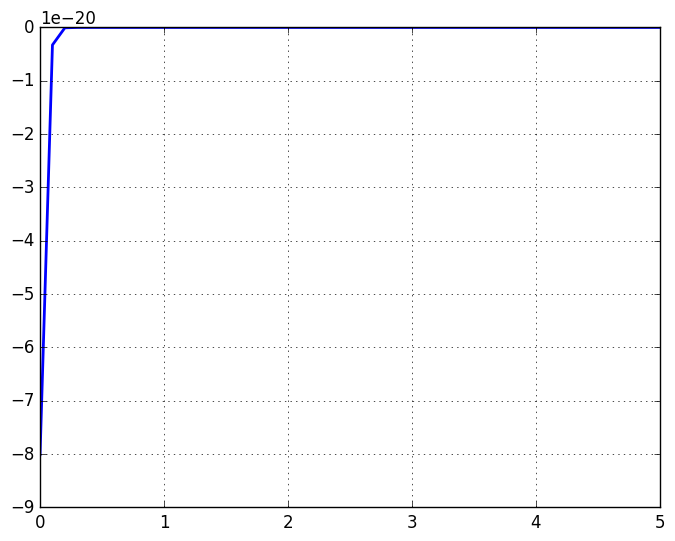

In [2]:
Es=collect(0:0.1:5.0)
ne_calc_test=Array{Float64}(length(Es))
#integrand(E)=q*getDOS_SingleBand_E(bandC,E).*(-1*fermiStat_Temp_Ef_E(300.0,0.0,E))
integrand(E)=q*(-1*fermiStat_Temp_Ef_E(300.0,0.0,E))
for (Esi,Esx) in enumerate(Es)
    ne_calc_test[Esi]=integrand(Esx)
    #a=quadgk(integrand,band.offset,band.offset+20kBe*Temp)
    #nodes, weights = qnwlege(100, band.offset, band.offset+20kBe*Temp)
    #a= do_quad(integrand,nodes, weights)
end
plot(Es,ne_calc_test,Linestyle="-",Linewidth="2",color="b")
grid()

In [2]:
1.4/6^(2/3)

0.42399480499416586

In [3]:
Es=collect(0:0.1:5.0)
Efx=Fermilevel_n(numofn[1],bndstTx,300.0,3.0)

1.0562152064870782

In [4]:
Eftest=collect(0.0:0.1:5.0)
ne_test=Array{Float64}(length(Eftest))
for (Efi,Efx) in enumerate(Eftest)
    ne_test[Efi]=NumofnMultiBand2(bndstTx,Efx,300.0,3.0)
end
ne_test*1e-6

51-element Array{Float64,1}:
   -914.661     
 -43771.1       
     -2.09466e6 
     -1.0024e8  
     -4.79697e9 
     -2.29559e11
     -1.09855e13
     -5.25708e14
     -2.51525e16
     -1.19179e18
     -4.08822e19
     -2.88596e20
     -7.29705e20
      ⋮         
     -2.79687e21
     -2.79687e21
     -2.79687e21
     -2.79687e21
     -2.79687e21
     -2.79687e21
     -2.79687e21
     -2.79687e21
     -2.79687e21
     -2.79687e21
     -2.79687e21
     -2.79687e21

In [5]:
Eftest=collect(0.0:0.1:5.0)
ne_test=Array{Float64}(length(Eftest))
for (Efi,Efx) in enumerate(Eftest)
    ne_test[Efi]=Numofn2(bandC,Efx,300.0,3.0)
end
ne_test*1e-6

51-element Array{Float64,1}:
   -914.661     
 -43771.1       
     -2.09466e6 
     -1.0024e8  
     -4.79697e9 
     -2.29559e11
     -1.09855e13
     -5.25708e14
     -2.51525e16
     -1.19179e18
     -4.08822e19
     -2.88596e20
     -7.29705e20
      ⋮         
     -2.79687e21
     -2.79687e21
     -2.79687e21
     -2.79687e21
     -2.79687e21
     -2.79687e21
     -2.79687e21
     -2.79687e21
     -2.79687e21
     -2.79687e21
     -2.79687e21
     -2.79687e21

In [3]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis)=electronicProps(bndstTx,xs,Ts,numofn,tauTOTTx,xmax)

 13.424423 seconds (36.46 M allocations: 4.351 GB, 6.76% gc time)


(
[1.05621; 1.05261; … ; 0.824259; 0.818678],

[70207.9; 67572.3; … ; 20632.2; 20282.4],

[-9.79407e-5; -0.000100746; … ; -0.000196894; -0.000198344],

[0.0; 0.0; … ; 0.0; 0.0],

[0.404968; 0.399877; … ; 0.264826; 0.263254],

[0.0; 0.0; … ; 0.0; 0.0],

[0.0; 0.0; … ; 0.0; 0.0])

In [4]:
sigmas

51×1×1 Array{Float64,3}:
[:, :, 1] =
 70207.9
 67572.3
 65100.9
 62779.2
 60594.4
 58535.1
 56591.1
 54753.4
 53013.7
 51364.8
 49800.0
 48313.3
 46899.3
     ⋮  
 24758.2
 24286.6
 23829.6
 23386.7
 22957.1
 22540.4
 22136.1
 21743.5
 21362.3
 20992.0
 20632.2
 20282.4